# Математическая статистика
## Домашнее задание 6

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_st_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b>:
* Задача 1 - 10 баллов
* Задача 2 - 30 баллов
* Задача 3 - 30 баллов

<b><font color="orange">Сложная часть</font></b>:
* Задача 4 - 60 баллов

In [1]:
# Bot check

# HW_ID: st_hw6
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import pandas as pd
import numpy as np

import scipy.stats as sps

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

-----

В этом задании вам нужно будет предобработать датасет и провести небольшой эксплораторный анализ, построив графики и посчитав несколько статистик, чтобы получить первое понимание о данных. Это та часть работы, которая является первостепенной в любом анализе. Она позволяет лучше понять объект исследования и "познакомиться" с данными.

Основная идея этого ноутбука - рассмотреть разные функции из библиотеки pandas и научиться их применять для обработки табличных данных. В качестве помощи можете воспользоваться:

- [Документация Pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)
- [Упражнения по Pandas](https://www.machinelearningplus.com/python/101-pandas-exercises-python/?utm_referrer=https://dzen.ru/media/id/5e048b1b2b616900b081f1d9/65805c3b83225d541b5a26be)

## Описание датасета

Датасет представляет из себя результаты секвенирования 16S рибосомальной РНК, необходимой для определения микробиотного состава кишечника у пациентов. 

### *meta.tsv*
Табличка с метаданными - общей информацией о пациентах, полученной независимо от основного эксперимента. Нам будут интересны следующие столбцы: 

- `№` - номер пациента
- `age`, `gender`, `height`, `weight`, `diet` - возраст, пол, рост, вес пациента и соблюдает ли он диету
- `diabetes` - длительность диабета
- `drug` - принимает ли пациент лекарство
- `glc`, `glyc_hem`, `ins` - уровни глюкозы, гликированного гемоглобина и инсулина в крови
- `creatinine`, `urea`, `alt`, `ast`, `c_reactive` - результаты анализов на креатинин, мочевину, АЛТ, АСТ и С реактивный белок 

### *bacteria_raw_\*.tsv*
Две таблицы с результатами секвенирования (вторая таблица - продолжение первой):
- `sample` - номер пациента, совпадающий с таковым в `meta`
- `reads` - число прочтений. Величина, пропорциональная содержанию бактерий
- `tax_depth` - таксономический ранг/уровень классификации бактерии
- `name` - название бактерии

Также вам даны две предобработанные таблички: `meta_processed` и `bacteria_processed`, которые необходимо использовать для подсчета статистик и отрисовки графиков в соответствующих заданиях.


## Задача 1. Предобработка метаданных

In [106]:
meta = pd.read_csv("data/meta.tsv", sep="\t")

print(meta.shape) 
meta.head(3)

(41, 20)


,№,age,gender,height,weight,glc,glyc_hem,ins,diabetes,drug,diet,hdl,ldl,vldl,cholesterol,creatinine,urea,alt,ast,c_reactive
0,2.0,52.0,Ж,175.0,99.0,"5,74","6,4","7,42",1.0,1.0,False,"1,23","1,81","0,56","3,6",97,"6,3",23,22,"0,9"
1,3.0,64.0,ж,172.0,87.0,"9,12","8,3","18,46",17.0,0.0,True,NaN,NaN,NaN,NaN,142,"10,18",NaN,NaN,NaN
2,6.0,58.0,Ж,158.0,80.0,"8,69","13,7",2,20.0,1.0,False,"1,25","2,2","0,55","3,88",83,"5,44",9,16,"4,3"


Можно видеть, что в табличке встречаются разные проблемы:
- точки и запятые использованы в качестве разделителя дробной части (а python принимает только точки);
- присутствует много пропусков (NaN);
- в колонке `gender` девушки записаны русскими буквами разного регистра;
- колонки `drug` и `diet` содержат информацию о наличии/отсутствии лекарств/диеты, но в одном случае это закодировано как 0/1, а в другом True/False;
- в колонце `glyc_hem` содержатся сторонние символы;

и т. д.


Все эти моменты необходимо определять во время работы с данными и чистить, чем мы ниже и будем заниматься.

Выведите названия всех колонок, которые есть в таблице. Колонку `№` переименуйте в `sample`, а `diabetes` в `diabetes_years`. Колонки `hdl`, `ldl`, `vldl` и `cholesterol` выбросите.

In [107]:
# выведем названия колонок
meta.columns

Index(['№', 'age', 'gender', 'height', 'weight', 'glc', 'glyc_hem', 'ins',
       'diabetes', 'drug', 'diet', 'hdl', 'ldl', 'vldl', 'cholesterol',
       'creatinine', 'urea', 'alt', 'ast', 'c_reactive'],
      dtype='object')

In [108]:
# переименование
meta.rename(columns={'№': 'sample', 'diabetes': 'diabetes_years'}, inplace=True)

# выброс ненужных колонок
meta = meta.drop(columns=['hdl', 'ldl', 'vldl', 'cholesterol'])


In [109]:
meta.head(6)

,sample,age,gender,height,weight,glc,glyc_hem,ins,diabetes_years,drug,diet,creatinine,urea,alt,ast,c_reactive
0,2.0,52.0,Ж,175.0,99.0,"5,74","6,4","7,42",1.0,1.0,False,97,"6,3",23,22,"0,9"
1,3.0,64.0,ж,172.0,87.0,"9,12","8,3","18,46",17.0,0.0,True,142,"10,18",NaN,NaN,NaN
2,6.0,58.0,Ж,158.0,80.0,"8,69","13,7",2,20.0,1.0,False,83,"5,44",9,16,"4,3"
3,7.0,60.0,Ж,166.0,94.0,"10,72","7,9","6,76",19.0,1.0,False,62,"4,47",49,20,"143,5"
4,8.0,51.0,Ж,172.0,92.0,"8,08","7,4","6,21",5.0,1.0,False,"97,8","5,2","30,7","33,4",NaN
5,11.0,56.0,Ж,156.0,85.0,"10,12",—,"4,27",15.0,1.0,False,"90,6","10,4",19,13,"7,1"


Выкиньте все строчки, которые содержат NA в одной из колонок: `sample`, `age`, `gender`, `height`, `weight`, `glc`, `glyc_hem`, `ins`, `diabetes_years`

In [110]:
meta = meta.dropna(subset=['sample', 'age', 'gender', 'height', 'weight', 'glc', 'glyc_hem', 'ins', 'diabetes_years'])

Замените значение уровня гликированного гемоглобина у 5 и 6 пациентов (колонка `sample`) на значение 6

In [111]:
meta.iat[5, 6] = 6
meta.iat[6, 6] = 6

In [112]:
meta.head(7)

,sample,age,gender,height,weight,glc,glyc_hem,ins,diabetes_years,drug,diet,creatinine,urea,alt,ast,c_reactive
0,2.0,52.0,Ж,175.0,99.0,"5,74","6,4","7,42",1.0,1.0,False,97,"6,3",23,22,"0,9"
1,3.0,64.0,ж,172.0,87.0,"9,12","8,3","18,46",17.0,0.0,True,142,"10,18",NaN,NaN,NaN
2,6.0,58.0,Ж,158.0,80.0,"8,69","13,7",2,20.0,1.0,False,83,"5,44",9,16,"4,3"
3,7.0,60.0,Ж,166.0,94.0,"10,72","7,9","6,76",19.0,1.0,False,62,"4,47",49,20,"143,5"
4,8.0,51.0,Ж,172.0,92.0,"8,08","7,4","6,21",5.0,1.0,False,"97,8","5,2","30,7","33,4",NaN
5,11.0,56.0,Ж,156.0,85.0,"10,12",6,"4,27",15.0,1.0,False,"90,6","10,4",19,13,"7,1"
6,12.0,76.0,м,156.0,80.0,"6,54",6,"4,55",11.0,1.0,False,NaN,"4,35",17,23,"4,3"


Переведите колонки `sample`, `age` и `diabetis_years` в целочисленный тип, `drug` в булевый, а остальные численные колонки в тип float 

*Обратите внимание, что в некоторых местах в качестве разделителя дробной части используется запятая вместо точки. Заменим ее везде на точку, например, с помощью `replace()`*.

In [113]:
meta = meta.astype({'sample': int, 'age': int, 'diabetes_years': int,'drug': bool})

cols_to_float = ['height', 'weight','glc','glyc_hem','ins','creatinine','urea','alt','ast','c_reactive']
meta[cols_to_float] = meta[cols_to_float].replace(",", ".", regex=True).astype(float)
meta.head(7)

,sample,age,gender,height,weight,glc,glyc_hem,ins,diabetes_years,drug,diet,creatinine,urea,alt,ast,c_reactive
0,2,52,Ж,175.0,99.0,5.74,6.4,7.42,1,True,False,97.0,6.30,23.0,22.0,0.9
1,3,64,ж,172.0,87.0,9.12,8.3,18.46,17,False,True,142.0,10.18,NaN,NaN,NaN
2,6,58,Ж,158.0,80.0,8.69,13.7,2.00,20,True,False,83.0,5.44,9.0,16.0,4.3
3,7,60,Ж,166.0,94.0,10.72,7.9,6.76,19,True,False,62.0,4.47,49.0,20.0,143.5
4,8,51,Ж,172.0,92.0,8.08,7.4,6.21,5,True,False,97.8,5.20,30.7,33.4,NaN
5,11,56,Ж,156.0,85.0,10.12,6.0,4.27,15,True,False,90.6,10.40,19.0,13.0,7.1
6,12,76,м,156.0,80.0,6.54,6.0,4.55,11,True,False,NaN,4.35,17.0,23.0,4.3


В колонке `gender` замените обозначение женского пола на "f", а мужского на "m". Может помочь функция `np.where()`.

In [121]:
meta['gender'] = np.where((meta['gender'] == 'м') | (meta['gender'] == 'М'), 'm', 'f')
meta

,sample,age,gender,height,weight,glc,glyc_hem,ins,diabetes_years,drug,diet,creatinine,urea,alt,ast,c_reactive
0,2,52,f,175.0,99.0,5.74,6.40,7.42,1,True,False,97.0,6.30,23.0,22.0,0.9
1,3,64,f,172.0,87.0,9.12,8.30,18.46,17,False,True,142.0,10.18,NaN,NaN,NaN
2,6,58,f,158.0,80.0,8.69,13.70,2.00,20,True,False,83.0,5.44,9.0,16.0,4.3
3,7,60,f,166.0,94.0,10.72,7.90,6.76,19,True,False,62.0,4.47,49.0,20.0,143.5
4,8,51,f,172.0,92.0,8.08,7.40,6.21,5,True,False,97.8,5.20,30.7,33.4,NaN
5,11,56,f,156.0,85.0,10.12,6.00,4.27,15,True,False,90.6,10.40,19.0,13.0,7.1
6,12,76,m,156.0,80.0,6.54,6.00,4.55,11,True,False,NaN,4.35,17.0,23.0,4.3
7,14,72,m,156.0,76.0,5.55,5.50,114.90,1,True,False,89.4,5.13,13.0,18.0,12.7
8,16,64,f,170.0,100.0,5.48,6.90,27.79,3,True,False,99.0,4.59,62.0,26.0,0.9
9,17,78,f,160.0,50.0,5.27,6.30,2.63,10,False,True,78.0,5.40,11.0,23.0,0.6


Посчитайте индекс массы тела (вес человека в кг, деленный на квадрат роста в метрах), запишите его в колонку `bmi`, и индекс HOMA (произведение концентраций глюкозы и инсулина, деленное на 22.5), запишите его в колонку `homa`. 

*Оставляйте значения с точностью до 2-х знаков после запятой*

In [126]:
meta['bmi'] = round(meta['weight']/((meta['height']/100))**2, 2)
meta['homa'] = round((meta['glc'] * meta['ins'])/22.5, 2)
meta.head(3)

,sample,age,gender,height,weight,glc,glyc_hem,ins,diabetes_years,drug,diet,creatinine,urea,alt,ast,c_reactive,bmi,homa
0,2,52,f,175.0,99.0,5.74,6.4,7.42,1,True,False,97.0,6.30,23.0,22.0,0.9,32.33,1.89
1,3,64,f,172.0,87.0,9.12,8.3,18.46,17,False,True,142.0,10.18,NaN,NaN,NaN,29.41,7.48
2,6,58,f,158.0,80.0,8.69,13.7,2.00,20,True,False,83.0,5.44,9.0,16.0,4.3,32.05,0.77


Клинические анализы могут варьироваться довольно сильно даже у одного пациента в пределах дня, поэтому переведите значения в категориальные данные. Если анализ меньше первого порогового значения, то такое состояние должно обозначаться -1, если в норме, то 0, если больше второго порогового значения, то 1. Здесь может помочь функция `np.where()`.

Список анализов и их граничные значения:
- `creatinine`: 57 - 115
- `urea`: 2.9 - 8.2
- `alt`: 0 - 28
- `ast`: 0 - 35
- `c reactive protein`: 0 - 5

*Обратите внимание, что nan не должны измениться (нам неизвестно соответствующее значение).*

In [152]:
meta['creatinine'] = np.where((meta['creatinine'] < 57), -1, 
                            (np.where((meta['creatinine'] > 115), 1, 
                                      np.where((57 <= meta['creatinine']) & (meta['creatinine'] <= 115), 0, meta['creatinine']))))

meta['urea'] = np.where((meta['urea'] < 2.9), -1, 
                            (np.where((meta['urea'] > 8.2), 1, 
                                      np.where((2.9 <= meta['urea']) & (meta['urea'] <= 8.2), 0, meta['urea']))))

meta['alt'] = np.where((meta['alt'] < 0), -1, 
                            (np.where((meta['alt'] > 28), 1, 
                                      np.where((0 <= meta['alt']) & (meta['alt'] <= 28), 0, meta['alt']))))

meta['ast'] = np.where((meta['ast'] < 0), -1, 
                            (np.where((meta['ast'] > 35), 1, 
                                      np.where((0 <= meta['ast']) & (meta['ast'] <= 35), 0, meta['ast']))))

meta['c_reactive'] = np.where((meta['c_reactive'] < 0), -1, 
                            (np.where((meta['c_reactive'] > 5), 1, 
                                      np.where((0 <= meta['c_reactive']) & (meta['c_reactive'] <= 5), 0, meta['c_reactive']))))
meta.head(5)

,sample,age,gender,height,weight,glc,glyc_hem,ins,diabetes_years,drug,diet,creatinine,urea,alt,ast,c_reactive,bmi,homa
0,2,52,f,175.0,99.0,5.74,6.4,7.42,1,True,False,0.0,0.0,0.0,0.0,0.0,32.33,1.89
1,3,64,f,172.0,87.0,9.12,8.3,18.46,17,False,True,1.0,1.0,NaN,NaN,NaN,29.41,7.48
2,6,58,f,158.0,80.0,8.69,13.7,2.00,20,True,False,0.0,0.0,0.0,0.0,0.0,32.05,0.77
3,7,60,f,166.0,94.0,10.72,7.9,6.76,19,True,False,0.0,0.0,1.0,0.0,1.0,34.11,3.22
4,8,51,f,172.0,92.0,8.08,7.4,6.21,5,True,False,0.0,0.0,1.0,0.0,NaN,31.10,2.23


Создайте столбец `obesity`, в котором будет обозначаться степень ожирения пациента (от 0 до 3 включительно). Ее определяют по индексу массы тела, сравнивания с граничными значениями равными 25, 30 и 35. 

In [156]:
meta['obesity'] = np.where((meta['bmi'] < 25), 0, 
                            (np.where((meta['bmi'] <= 30), 1, 
                                      np.where((meta['bmi'] <= 35), 2, 3))))
meta.head(5)


,sample,age,gender,height,weight,glc,glyc_hem,ins,diabetes_years,drug,diet,creatinine,urea,alt,ast,c_reactive,bmi,homa,obesity
0,2,52,f,175.0,99.0,5.74,6.4,7.42,1,True,False,0.0,0.0,0.0,0.0,0.0,32.33,1.89,2
1,3,64,f,172.0,87.0,9.12,8.3,18.46,17,False,True,1.0,1.0,NaN,NaN,NaN,29.41,7.48,1
2,6,58,f,158.0,80.0,8.69,13.7,2.00,20,True,False,0.0,0.0,0.0,0.0,0.0,32.05,0.77,2
3,7,60,f,166.0,94.0,10.72,7.9,6.76,19,True,False,0.0,0.0,1.0,0.0,1.0,34.11,3.22,2
4,8,51,f,172.0,92.0,8.08,7.4,6.21,5,True,False,0.0,0.0,1.0,0.0,NaN,31.10,2.23,2


***В следующих заданиях используйте предобработанную таблицу `meta_processed`***

## Задача 2. Визуализация метаданных

In [262]:
meta = pd.read_csv("data/meta_processed.tsv", sep="\t")

meta.head()

,sample,age,gender,height,weight,glc,glyc_hem,ins,diabetes_years,drug,diet,creatinine,urea,alt,ast,c_reactive,bmi,homa,obesity
0,2,52,f,175.0,99.0,5.74,6.4,7.42,1,True,False,0.0,0.0,0.0,0.0,0.0,32.33,1.89,2
1,3,64,f,172.0,87.0,9.12,8.3,18.46,17,False,True,1.0,1.0,NaN,NaN,NaN,29.41,7.48,1
2,6,58,f,158.0,80.0,8.69,13.7,2.00,20,True,False,0.0,0.0,0.0,0.0,0.0,32.05,0.77,2
3,7,60,f,166.0,94.0,10.72,7.9,6.76,19,True,False,0.0,0.0,1.0,0.0,1.0,34.11,3.22,2
4,8,51,f,172.0,92.0,8.08,7.4,6.21,5,True,False,0.0,0.0,1.0,0.0,NaN,31.10,2.23,2


Выведите, сколько людей относится к каждой из групп (0,1,.. или True/False) с точки зрения степени ожирения и принятия лекарства. Вспользуйтесь функцией `value_counts()`.

In [166]:
obesity_count = meta['obesity'].value_counts()
drug_count = meta['drug'].value_counts()
obesity_count, drug_count

(2    12
 1     7
 3     6
 0     4
 Name: obesity, dtype: int64,
 True     22
 False     7
 Name: drug, dtype: int64)

Постройте [таблицу сопряженности](https://ru.wikipedia.org/wiki/%D0%A2%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B0_%D1%81%D0%BE%D0%BF%D1%80%D1%8F%D0%B6%D1%91%D0%BD%D0%BD%D0%BE%D1%81%D1%82%D0%B8) для пола и всевозможных комбинаций результатов АЛТ и АСТ. Может пригодиться функция `pd.crosstab()`.

In [168]:
сontingency_table = pd.crosstab(meta['gender'], columns=[meta['alt'], meta['ast']])
сontingency_table

alt    0.0     1.0    
ast    0.0 1.0 0.0 1.0
gender                
f        9   0   4   3
m        7   1   2   0

Посчитайте среднюю продолжительность диабета у каждой из групп пациентов по степени ожирения. Может пригодиться метод `groupby()`.

In [177]:
average_time_diabet = round(meta.groupby('obesity')['diabetes_years'].mean(), 2)
average_time_diabet

obesity
0    13.75
1    14.00
2     9.58
3     5.50
Name: diabetes_years, dtype: float64

Посчитайте средний уровень глюкозы и число пациентов в зависимости от пола человека и является ли он старым (>= 65 лет). Используйте метод `groupby()`.

In [185]:
meta['old'] = (meta['age'] >= 65)
grouped = meta.groupby(['gender', 'old'])['glc'].agg(['mean', 'count'])
grouped['mean'] = result['mean'].round(2)
grouped

mean  count
gender old               
f      False  8.35     12
       True   6.67      6
m      False  6.88      4
       True   7.91      7

Постройте график зависимости уровня гликированного гемоглобина от уровня глюкозы и отобразите на нем прямую при помощи `sns.regplot()`. Измените цвета точек на черный, а прямой на красный.

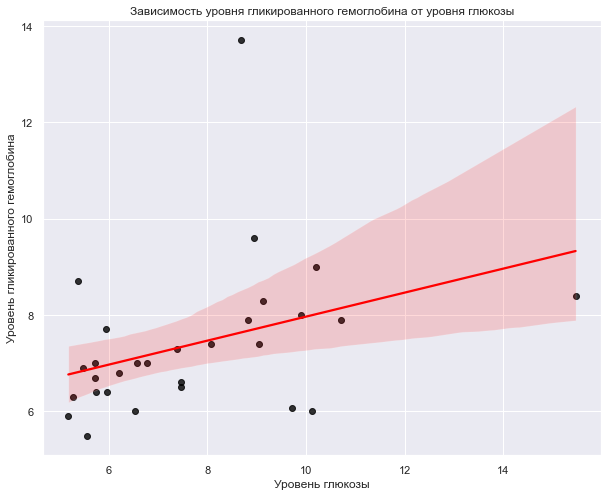

In [187]:
plt.figure(figsize=(10, 8))
sns.regplot(x='glc', y='glyc_hem', data=meta,
            scatter_kws={'color': 'black'}, line_kws={'color': 'red'})
plt.title('Зависимость уровня гликированного гемоглобина от уровня глюкозы')
plt.xlabel('Уровень глюкозы')
plt.ylabel('Уровень гликированного гемоглобина')
plt.show()

Постройте график зависимости соблюдения диеты от использования лекарства и добавьте на него информацию о поле и возрасте, изменяя цвет и размер точек. Добавьте разброс точек (при помощи `sps.norm(...).rvs(...)`), чтобы они все были отчетливо видны.

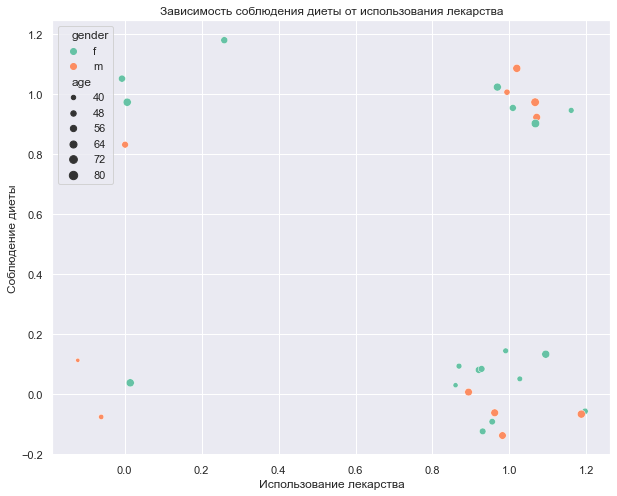

In [214]:
plt.figure(figsize=(10, 8))
meta_edit['rvs_x']= sps.norm.rvs(loc= meta_edit['drug'], scale = 0.1)
meta_edit['rvs_y']= sps.norm.rvs(loc= meta_edit['diet'],scale = 0.1)
sns.scatterplot(x='rvs_x', y='rvs_y', data=meta_edit,palette="Set2",
        hue='gender', size='age')
plt.title('Зависимость соблюдения диеты от использования лекарства')
plt.xlabel('Использование лекарства')
plt.ylabel('Соблюдение диеты')
plt.show()

## Задача 3. Предобработка данных секвенирования

Данные по содержанию бактерий хранятся в двух файлах, так как они были получены в два раунда из-за ограничений по вместимости эксперимента. 

Нумерация пациентов должна быть сквозной, то есть 1 пациент во второй табличке - это 22 пациент по сквозной нумерации (которая и используется в метаданных). Поэтому прибавим 21 ко всем номерам пациентов из второго файла.

In [315]:
df1 = pd.read_csv("data/bacteria_1.tsv", sep="\t")
df2 = pd.read_csv("data/bacteria_2.tsv", sep="\t")

df2["sample"] += 21

data = pd.concat([df1, df2]).reset_index(drop=True)

data.iloc[600:610, :]

,sample,fraction,reads,tax_depth,name
600,21,1.45,1591,P,Proteobacteria
601,21,1.11,1229,C,Betaproteobacteria
602,21,1.07,1197,F,Alcaligenaceae
603,21,1.06,1164,G,Sutterella
604,22,83.00,46136,D,Bacteria
605,22,71.38,41294,P,Bacteroidetes
606,22,71.35,40483,C,Bacteroidia
607,22,71.35,39062,O,Bacteroidales
608,22,63.47,34938,F,Bacteroidaceae
609,22,63.44,36373,G,Bacteroides


Может случиться так, что некоторые бактерии имеют полностью совпадающие названия, даже если они находятся на разных таксономических уровнях. Проверьте, есть ли такие случаи в наших данных.

Сделать это можно, например, с помощью метода `groupby()` и подсчета числа уникальных значений в колонке `tax_depth` для каждой бактерий. 

In [316]:
dupl = data.groupby('name')['tax_depth'].nunique()
dupl_bacteria = dupl[dupl > 1]

dupl_bacteria

name
Actinobacteria    2
Name: tax_depth, dtype: int64

Добавьте к названиям бактерий их таксономическую группу через нижнее подчеркивание. Удалите колонки `tax_depth` и `fraction`.

Например, ***C***    ***Bacteroidia*** -> ***Bacteroidia_C***

In [317]:
data['name'] = data.apply(lambda x: f"{x['name']}_{x['tax_depth']}", axis=1)
data = data.drop(columns=['tax_depth', 'fraction'])
data

,sample,reads,name
0,1,81682,Bacteria_D
1,1,47936,Firmicutes_P
2,1,47549,Clostridia_C
3,1,46232,Clostridiales_O
4,1,13408,Ruminococcaceae_F
...,...,...,...
1371,49,8357,Faecalibacterium_G
1372,49,7845,Faecalibacterium prausnitzii_S
1373,49,2504,Lachnospiraceae_F
1374,49,2751,Proteobacteria_P


Оставьте в данных секвенирования и в метаданных только тех пациентов, которые присутствуют в обеих таблицах.

In [318]:
metadata = pd.merge(data, meta, on='sample', how='inner')
metadata

,sample,reads,name,age,gender,height,weight,glc,glyc_hem,ins,...,drug,diet,creatinine,urea,alt,ast,c_reactive,bmi,homa,obesity
0,2,103988,Bacteria_D,52,f,175.0,99.0,5.74,6.40,7.42,...,True,False,0.0,0.0,0.0,0.0,0.0,32.33,1.89,2
1,2,88832,Bacteroidetes_P,52,f,175.0,99.0,5.74,6.40,7.42,...,True,False,0.0,0.0,0.0,0.0,0.0,32.33,1.89,2
2,2,93390,Bacteroidia_C,52,f,175.0,99.0,5.74,6.40,7.42,...,True,False,0.0,0.0,0.0,0.0,0.0,32.33,1.89,2
3,2,89610,Bacteroidales_O,52,f,175.0,99.0,5.74,6.40,7.42,...,True,False,0.0,0.0,0.0,0.0,0.0,32.33,1.89,2
4,2,68942,Bacteroidaceae_F,52,f,175.0,99.0,5.74,6.40,7.42,...,True,False,0.0,0.0,0.0,0.0,0.0,32.33,1.89,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,47,360,Proteobacteria_P,61,f,156.0,49.0,9.71,6.07,4.43,...,True,False,0.0,1.0,0.0,0.0,0.0,20.13,1.91,0
651,47,297,Betaproteobacteria_C,61,f,156.0,49.0,9.71,6.07,4.43,...,True,False,0.0,1.0,0.0,0.0,0.0,20.13,1.91,0
652,47,307,Burkholderiales_O,61,f,156.0,49.0,9.71,6.07,4.43,...,True,False,0.0,1.0,0.0,0.0,0.0,20.13,1.91,0
653,47,311,Alcaligenaceae_F,61,f,156.0,49.0,9.71,6.07,4.43,...,True,False,0.0,1.0,0.0,0.0,0.0,20.13,1.91,0


Разверните таблицу с данными секвенирования так, чтобы строки соответствовали пациентам, столбцы - бактериям, а на их пересечении стояло число прочтений (колонка `reads`). Воспользуйтесь методом `pivot_table()`. 

*Все отсутствующие бактерии у пациентов должны быть записаны нулем прочтений.*

In [328]:
pivoted_data = metadata.pivot_table(index='sample', columns='name', values='reads', fill_value=0)
pivoted_data.columns.name = None  
pivoted_data = pivoted_data.reset_index()
pivoted_data.set_index('sample')

,Actinobacteria_C,Actinobacteria_P,Akkermansia muciniphila_S,Akkermansia_G,Alcaligenaceae_F,Alphaproteobacteria_C,Anaerotruncus_G,Bacilli_C,Bacteria_D,Bacteroidaceae_F,...,Victivallaceae_F,Victivallales_O,WCHB1-41_O,[Barnesiellaceae]_F,[Eubacterium] biforme_S,[Lentisphaeria]_C,[Odoribacteraceae]_F,[Paraprevotellaceae]_F,[Prevotella]_G,[Ruminococcus]_G
sample,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,0,103988,68942,...,0,0,0,0,0,0,0,1080,0,0
3,0,0,0,0,114,0,0,0,7884,1141,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1661,0,0,0,92640,20612,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,562,0,0,0,53228,31164,...,0,0,0,0,0,0,0,1440,0,0
8,0,0,0,0,0,0,0,0,36537,24494,...,0,0,0,0,0,0,0,0,4674,0
11,0,0,0,0,0,0,0,0,39792,8177,...,0,0,0,0,453,0,0,0,0,0
12,0,0,0,0,1237,0,0,338,30890,7424,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,910,80367,38622,...,0,0,0,1431,0,0,0,0,0,0
16,0,0,3654,3652,0,2718,0,0,86925,32654,...,0,0,0,0,0,0,2043,0,0,0


Оставьте только те бактерии, которые присутствуют хотя бы у двух пациентов.

*В качестве первого шага можете сравнить табличку с нулем*

In [329]:
bacteria_data = pivoted_data.drop(columns='sample')
bacteria_to_keep = (bacteria_data > 0).sum() >= 2
filtered_data = pivoted_data.loc[:, ['sample'] + list(bacteria_data.columns[bacteria_to_keep])]
filtered_data = filtered_data.set_index('sample')

filtered_data.head()

,Akkermansia muciniphila_S,Akkermansia_G,Alcaligenaceae_F,Bacilli_C,Bacteria_D,Bacteroidaceae_F,Bacteroidales_O,Bacteroides caccae_S,Bacteroides eggerthii_S,Bacteroides fragilis_S,...,Tenericutes_P,Veillonellaceae_F,Verrucomicrobia_P,Verrucomicrobiaceae_F,Verrucomicrobiae_C,Verrucomicrobiales_O,[Barnesiellaceae]_F,[Odoribacteraceae]_F,[Paraprevotellaceae]_F,[Prevotella]_G
sample,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,103988,68942,89610,2400,0,4064,...,0,0,0,0,0,0,0,0,1080,0
3,0,0,114,0,7884,1141,2084,0,0,0,...,0,219,0,0,0,0,0,0,0,0
6,0,0,1661,0,92640,20612,54911,0,0,0,...,0,3937,0,0,0,0,0,0,0,0
7,0,0,562,0,53228,31164,38542,0,3509,908,...,0,1024,0,0,0,0,0,0,1440,0
8,0,0,0,0,36537,24494,32247,0,0,558,...,0,794,0,0,0,0,0,0,0,4674


***В следующих заданиях используйте предобработанную таблицу `bacteria_processed.tsv`***

## Задача 4. Визуализация данных секвенирования

In [392]:
data = pd.read_csv("data/bacteria_processed.tsv", sep="\t", index_col=0)

data.head()

,Akkermansia muciniphila_S,Akkermansia_G,Alcaligenaceae_F,Bacilli_C,Bacteria_D,Bacteroidaceae_F,Bacteroidales_O,Bacteroides caccae_S,Bacteroides eggerthii_S,Bacteroides fragilis_S,...,Tenericutes_P,Veillonellaceae_F,Verrucomicrobia_P,Verrucomicrobiaceae_F,Verrucomicrobiae_C,Verrucomicrobiales_O,[Barnesiellaceae]_F,[Odoribacteraceae]_F,[Paraprevotellaceae]_F,[Prevotella]_G
sample,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,103988,68942,89610,2400,0,4064,...,0,0,0,0,0,0,0,0,1080,0
3,0,0,114,0,7884,1141,2084,0,0,0,...,0,219,0,0,0,0,0,0,0,0
6,0,0,1661,0,92640,20612,54911,0,0,0,...,0,3937,0,0,0,0,0,0,0,0
7,0,0,562,0,53228,31164,38542,0,3509,908,...,0,1024,0,0,0,0,0,0,1440,0
8,0,0,0,0,36537,24494,32247,0,0,558,...,0,794,0,0,0,0,0,0,0,4674


Посчитайте сколько различных бактерий каждого из таксономических рангов встречается у каждого `sample` (бактерия соответствует больше нуля прочтений) и усредните по пациентам.

In [393]:
rangs = list(set([row[-1:] for row in list(data)]))
rangs

['O', 'C', 'P', 'F', 'D', 'S', 'G']

In [400]:
'''data_rang = data.copy()
for rang in rangs:
    data_rang[rang] = data.filter(regex= f"{rang}$").sum(axis = 1)
data_rang[rangs]'''

data_rang = data.copy()
for rang in rangs:
    data_rang_edit = data_rang.filter(regex= f"{rang}$")
    for column in data_rang_edit:
        data_rang_edit[column] = np.where((data_rang_edit[column] != 0), 1, 0)
    data_rang[rang] = data_rang_edit.sum(axis = 1)

data_rang = data_rang[rangs]
data_rang.loc['mean_value'] = data_rang.mean()
data_rang

C:\Users\natal\AppData\Local\Temp/ipykernel_18484/1948430839.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rang_edit[column] = np.where((data_rang_edit[column] != 0), 1, 0)


,O,C,P,F,D,S,G
sample,,,,,,,
2,2.000000,2.000000,3.000000,6.000000,1.0,5.000000,3.000000
3,4.000000,4.000000,3.000000,9.000000,1.0,1.000000,6.000000
6,4.000000,3.000000,3.000000,9.000000,1.0,4.000000,7.000000
7,4.000000,2.000000,3.000000,10.000000,1.0,4.000000,4.000000
8,2.000000,0.000000,2.000000,6.000000,1.0,3.000000,5.000000
11,4.000000,4.000000,3.000000,11.000000,1.0,2.000000,6.000000
12,4.000000,5.000000,3.000000,8.000000,1.0,2.000000,5.000000
14,2.000000,3.000000,3.000000,5.000000,1.0,5.000000,3.000000
16,5.000000,4.000000,5.000000,10.000000,1.0,3.000000,6.000000


Оставьте только колонки, которые соответствуют бактериям с таксономическим рангом P, и постройте для них ***stacked barplot*** процентных содержаний для каждого из пациентов. То есть для каждого `sample` должен получится столбик, который отображает процентный состав всех бактерий из таксономического ранга P.

*Для подсчета числа процентов воспользуйтесь методом `apply()`. Легенду отобразите вне графика*

In [403]:
data_P = data.filter(regex='P$')
data_P

data_P = data_P.apply(lambda x: x/(data_P.sum(axis = 1)))

,Bacteroidetes_P,Firmicutes_P,Proteobacteria_P,Synergistetes_P,Tenericutes_P,Verrucomicrobia_P
sample,,,,,,
2,88832,11023,1314,0,0,0
3,2051,4051,1324,0,0,0
6,55563,32675,4518,0,0,0
7,40432,11229,942,0,0,0
8,32976,2385,0,0,0,0
11,11746,24206,1429,0,0,0
12,22719,5678,2065,0,0,0
14,48733,29351,1503,0,0,0
16,48440,25320,7263,0,1304,3591


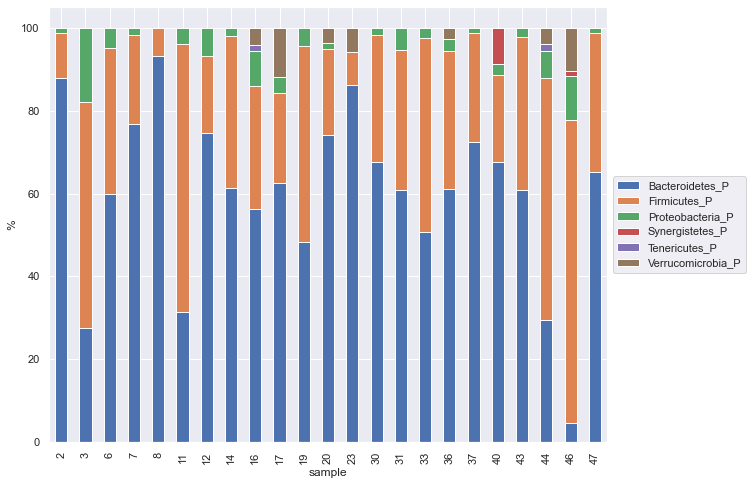

In [417]:
data_P = data_P.apply(lambda x: 100*x/(data_P.sum(axis = 1)))
data_P.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.ylabel('%')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Постройте гистограммы распределений процентного содержания (посчитанного выше) всех бактерий таксономического ранга P по пациентам. Каждую гистограмму отобразите на отдельном графике при помощи `plt.subplots()`

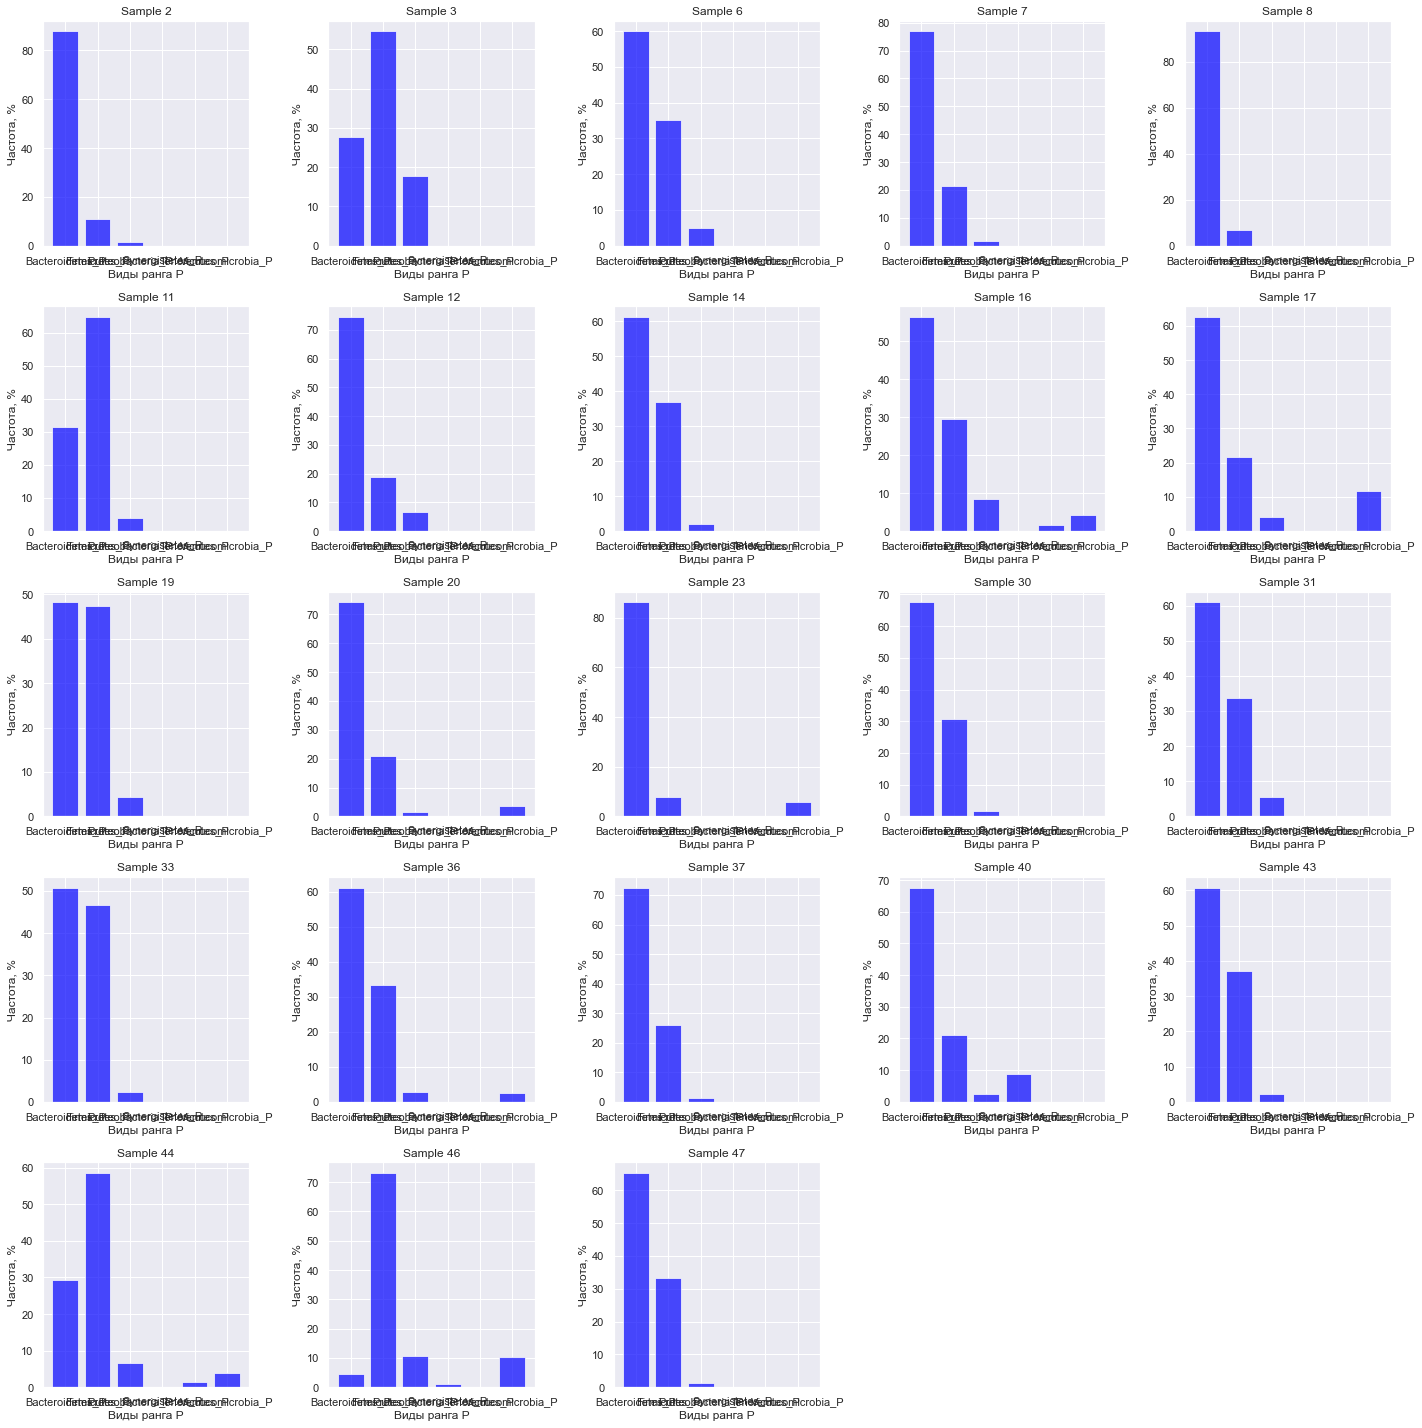

In [441]:
fig, axes = plt.subplots(nrows = 5, ncols = 5, figsize = (20, 20))
plt.subplots_adjust(hspace = 0.6, wspace = 0.6) #добавляем пространство между графиками
for ax in axes.flat[23:]:
    ax.remove()
    
for i, sample in enumerate(data_P.index):
    ax = axes.flat[i]
    ax.bar(data_P.columns, data_P.loc[sample], color='blue', alpha=0.7)
    ax.set_title(f'Sample {sample}')
    ax.set_xlabel('Виды ранга P')
    ax.set_ylabel('Частота, %')

plt.tight_layout()
plt.show()


plt.show()

Аналогично выше постройте ***stacked barplots*** для всех таксономических рангов кроме D. Графики объедините с помощью `plt.subplots()`. 

*Все бактерии, которые в среднем представлены меньше, чем в одном проценте прочтений по пациентам, объедините под именем "others".* 

Разделите людей на три группы по длительности диабета:
- болеет меньше 10 лет
- болеет от 10 до 19 лет включительно
- болеет 20 лет и больше

Для каждой из групп постройте ***pie chart***, отображающий содержание бактерий ранга P.